In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.models import Model, Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import *
from keras.models import load_model


In [4]:
model = load_model('ECG_mode-mitbih_train.h5')

In [5]:
test_abnormal_csv = r'C:\Users\rd\Downloads\ptbdb_abnormal.csv\ptbdb_abnormal.csv'

In [6]:
test_normal_csv = r'C:\Users\rd\Downloads\ptbdb_normal.csv\ptbdb_normal.csv'

In [8]:
data1 = pd.read_csv(r'C:\Users\rd\Downloads\ptbdb_abnormal.csv\ptbdb_abnormal.csv')

In [100]:
data2 = pd.read_csv(r'C:\Users\rd\Downloads\ptbdb_normal.csv\ptbdb_normal.csv')

In [9]:
data1.info()
data1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
heartbeat_1 = data1.head(5)
arr1 = heartbeat_1.to_numpy()
print (arr1)

[[1.         0.6069411  0.38418078 0.25423729 0.2235674  0.27683616
  0.25343019 0.18482648 0.15334947 0.12187248 0.12510088 0.1291364
  0.13720742 0.13720742 0.13236481 0.12671509 0.15819208 0.15254237
  0.13236481 0.16868442 0.15657789 0.18321227 0.19128329 0.20419693
  0.23002422 0.24455206 0.2857143  0.30750605 0.32122681 0.32768363
  0.3518967  0.37368846 0.39709443 0.36319613 0.34059724 0.30750605
  0.2582728  0.19774011 0.19935432 0.17352703 0.14769976 0.13559322
  0.13397902 0.10573043 0.12187248 0.13559322 0.10653753 0.14850686
  0.13559322 0.13478611 0.15092817 0.16464891 0.09443099 0.10653753
  0.12106538 0.14124294 0.12267958 0.13559322 0.1315577  0.15092817
  0.11702986 0.13317192 0.10411622 0.13720742 0.11945117 0.11460856
  0.0968523  0.09120258 0.1291364  0.10008071 0.08635997 0.11380145
  0.04116223 0.09362389 0.08151735 0.07425343 0.08071025 0.07990315
  0.07828894 0.05326876 0.07506053 0.07586764 0.08071025 0.10411622
  0.08393866 0.07667474 0.11945117 0.11299435 0.0

5


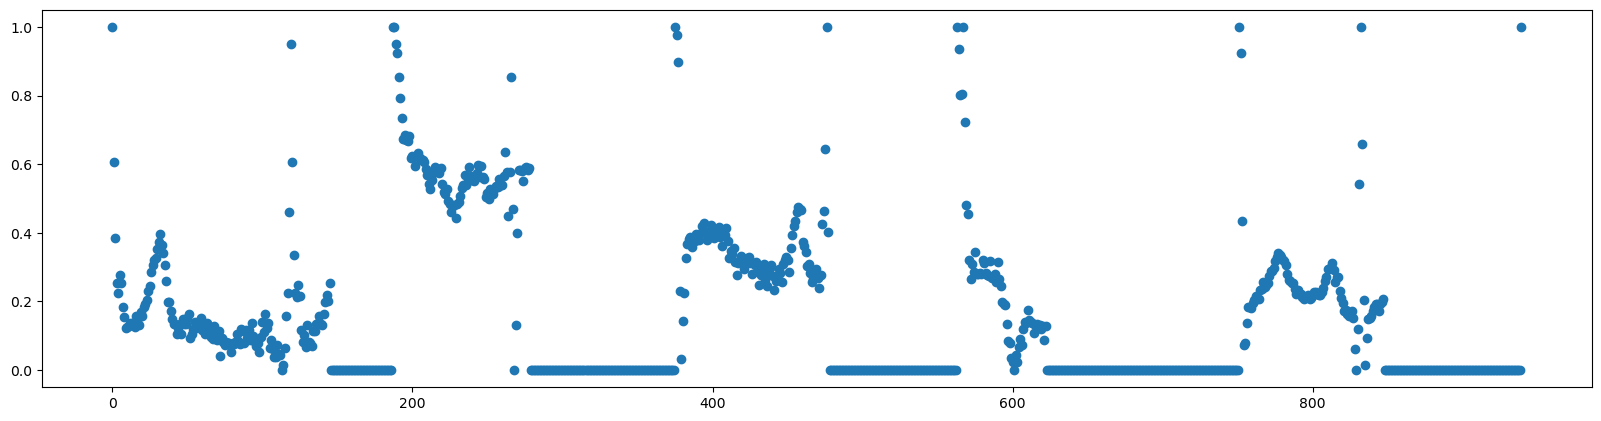

In [102]:
import matplotlib.pyplot as plt
y = len(arr1)
print(y)
y = y*188
plt.rcParams.update({'figure.figsize':(20,5), 'figure.dpi':100})
plt.scatter(range(y), arr1)

In [160]:
arr1.size

940

In [186]:
data_df = pd.read_csv("ecg.csv")
data_df.info()
arr3 = data_df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Columns: 141 entries, -0.11252183 to 1
dtypes: float64(140), int64(1)
memory usage: 5.4 MB


In [185]:
arr3.size

704577

In [188]:
res = model.predict([data1])

In [191]:
print(res[:3])

[[9.9997473e-01 2.5273843e-05 8.5215618e-13 4.4228486e-14 2.5926463e-17]
 [3.1482175e-03 1.7042071e-11 9.9531674e-01 1.0881493e-07 1.5349692e-03]
 [9.9612373e-01 3.8762414e-03 6.9814665e-09 1.7024000e-08 3.7138231e-13]]
